# Aim
What is happening on energy lanscape level on 20 node graphs at 40% even degree nodes

## Basics

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt

2021-09-16 03:56:15,908- WARNING•	QuickBB solver is unavailable
2021-09-16 03:56:15,910- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


In [3]:
import torch

# Fetching Graphs

In [4]:
file1 = open("110_20_node_graphs_data.txt")
file2 = open("110_20_node_graphs.txt")

In [5]:
g_data = list(np.loadtxt(file1).reshape(110,20,4))
mat_list = list(np.loadtxt(file2).reshape(110,20,20))

In [6]:
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

In [7]:
g_list = mats_to_graphs(mat_list)

In [8]:
def find_max_energy(results):
    """
    Given multiple local optima, find the max
    """
    energies = []
    for i in range(len(results)):
        energies.append(results[i][2])
    return max(energies)

In [9]:
max_energies = [find_max_energy(g_data[i]) for i in range(len(g_list))]

# Generating energy landscapes of 40% graphs

In [10]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

In [11]:
imp_graphs = []
for i in range(len(g_data)):
    graph = g_list[i]
    if even_percent(graph) in [0.3,0.4,0.5,0.6]:
        imp_graphs.append(i)
len(imp_graphs)

40

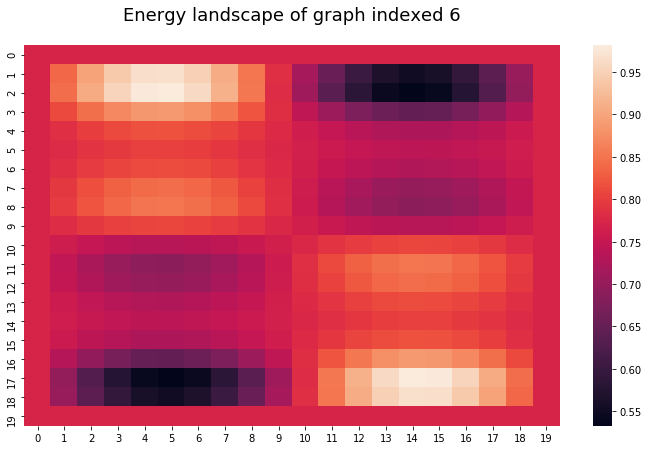

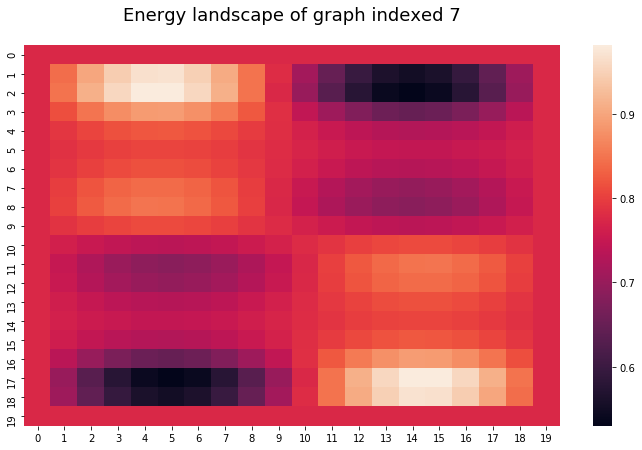

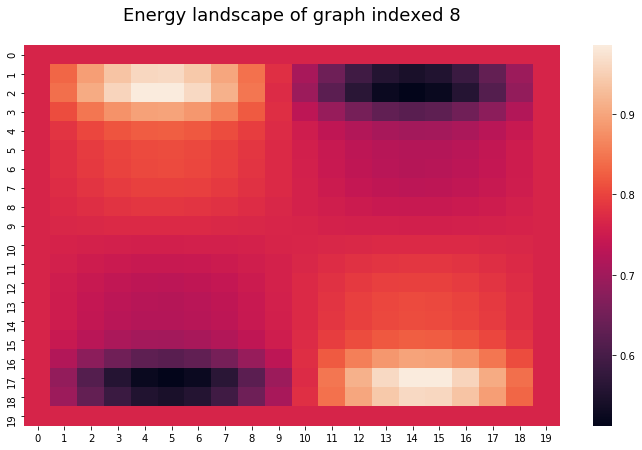

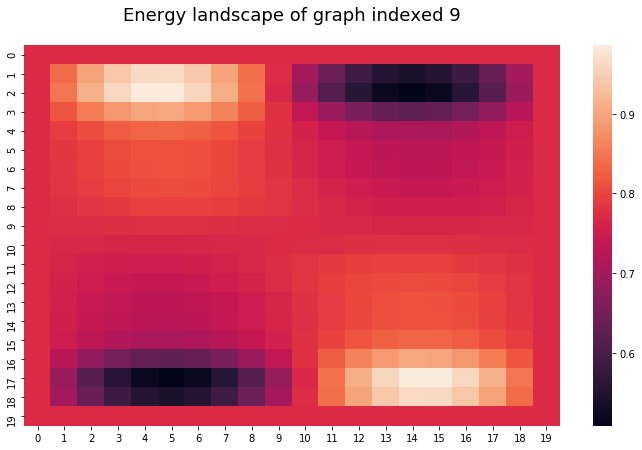

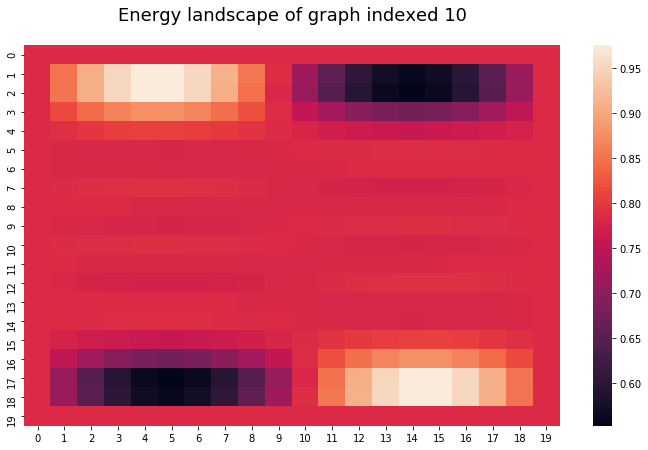

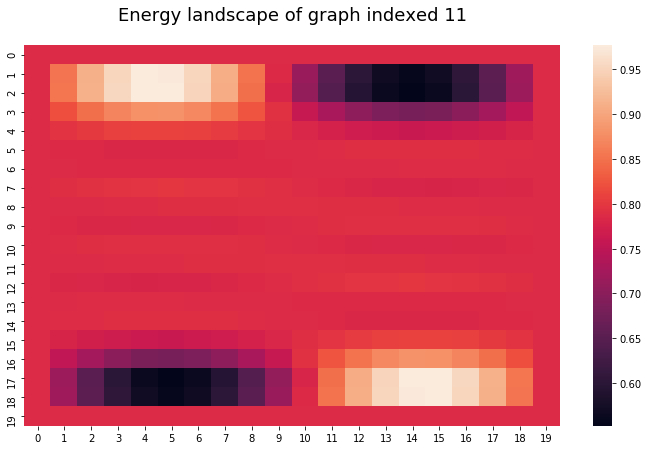

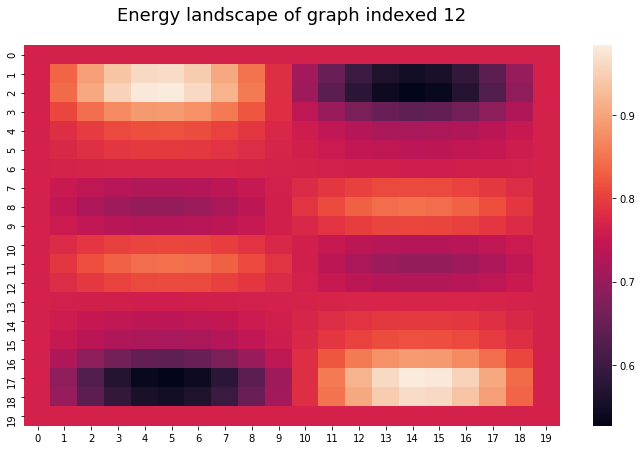

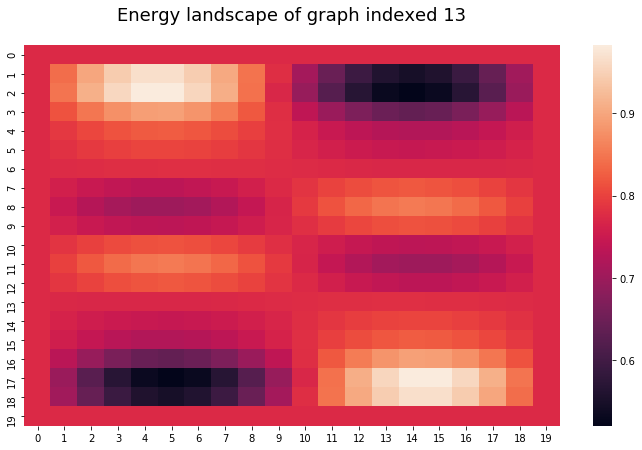

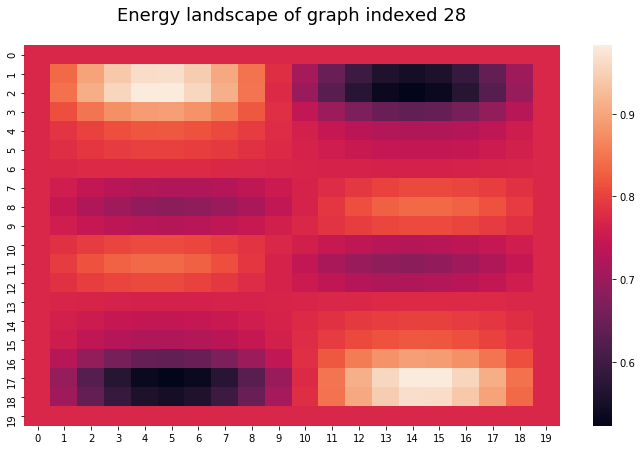

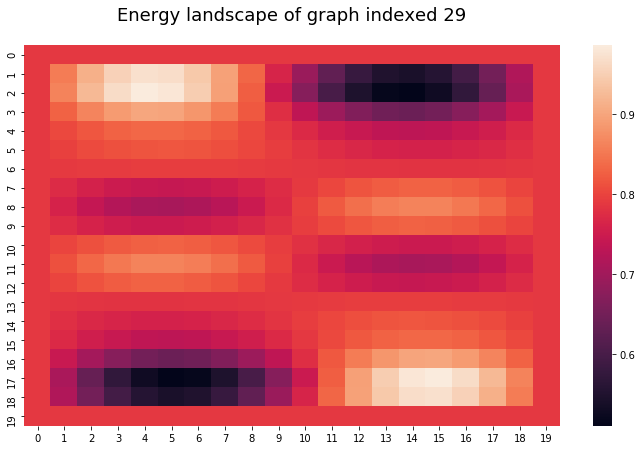

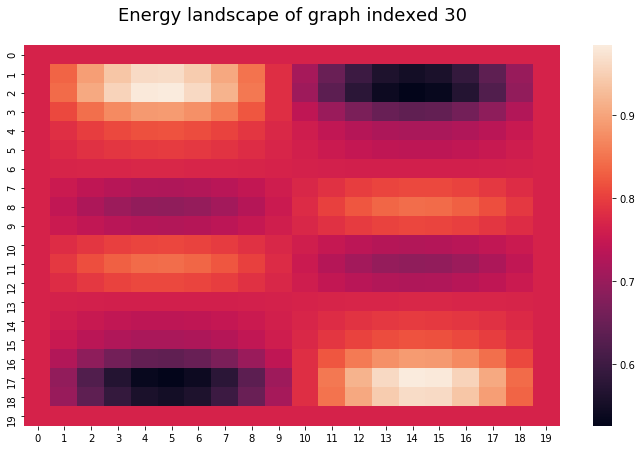

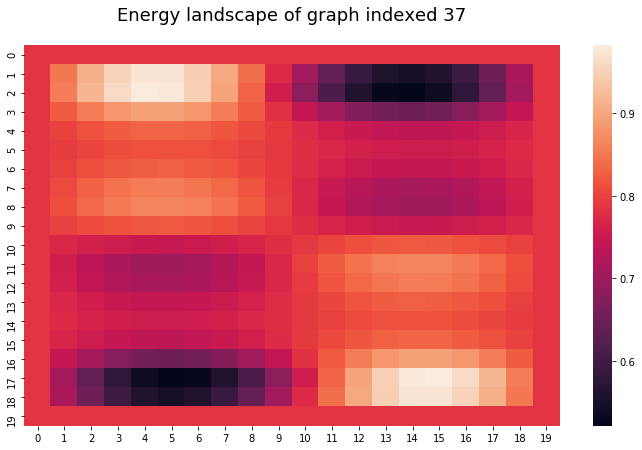

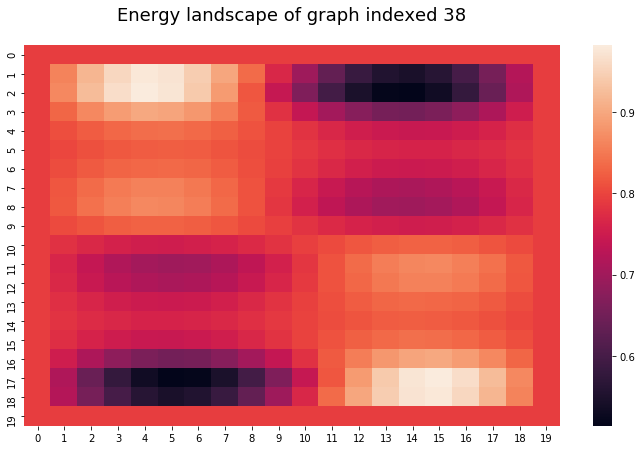

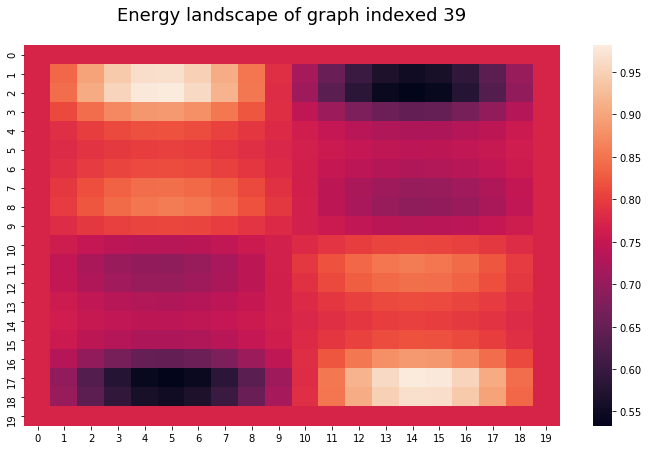

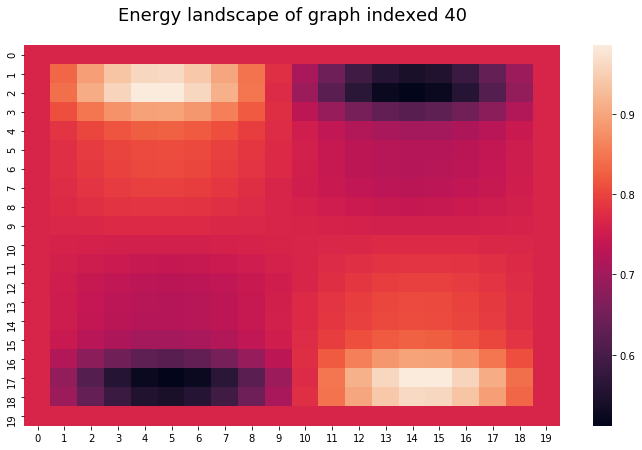

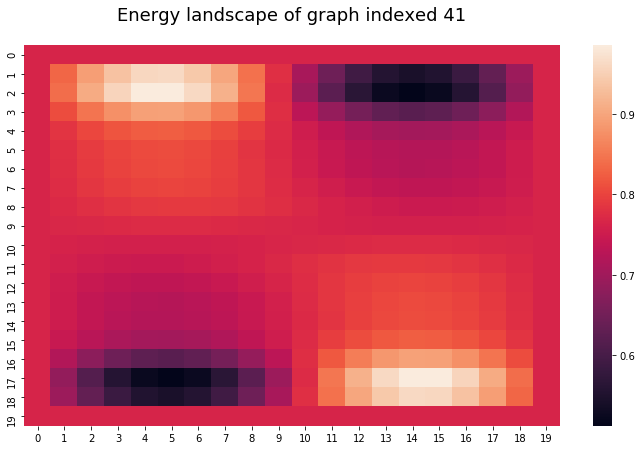

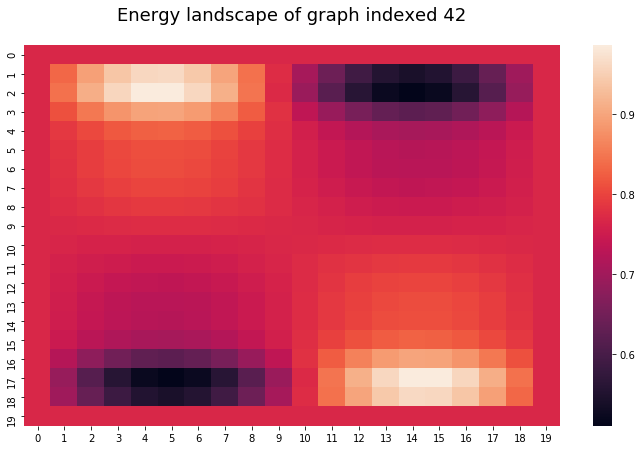

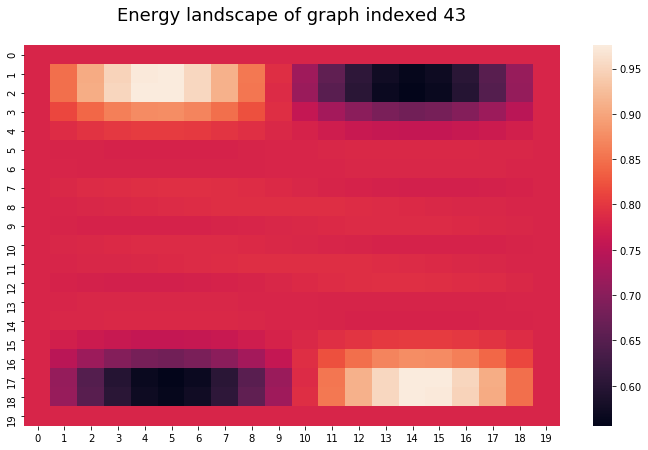

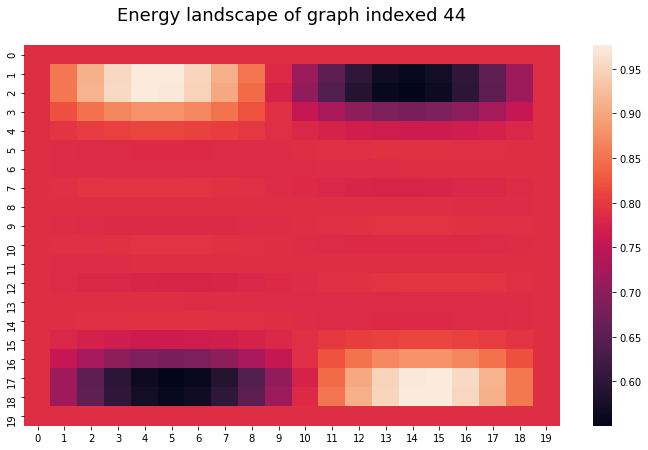

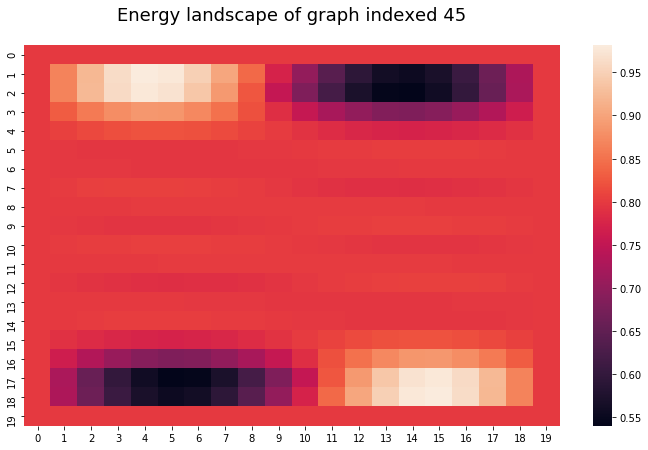

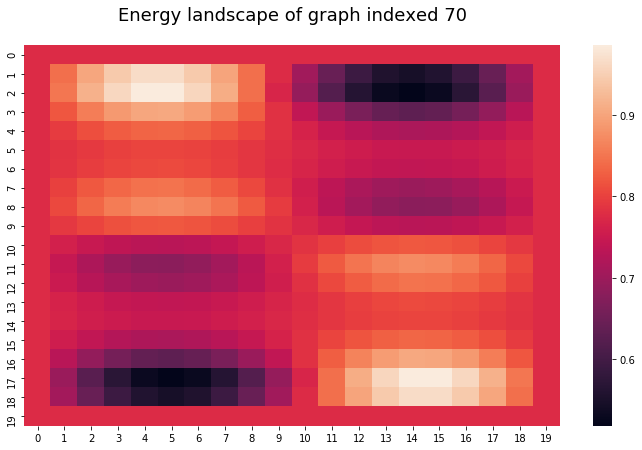

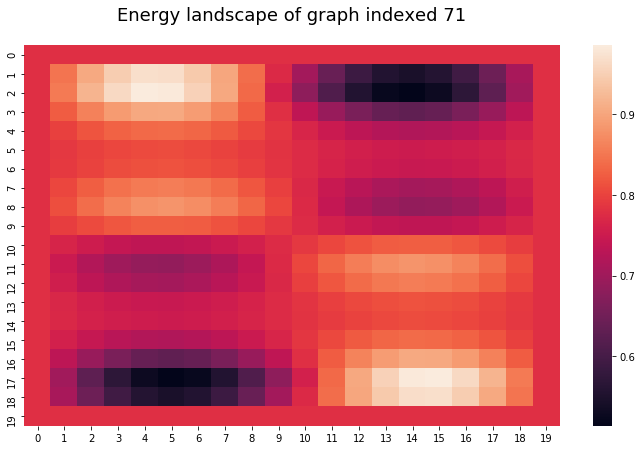

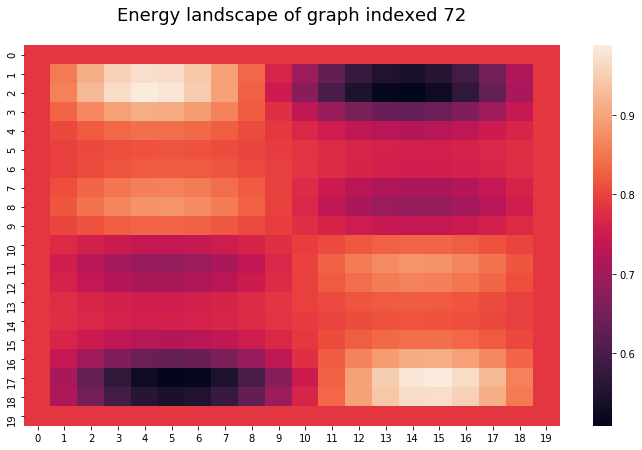

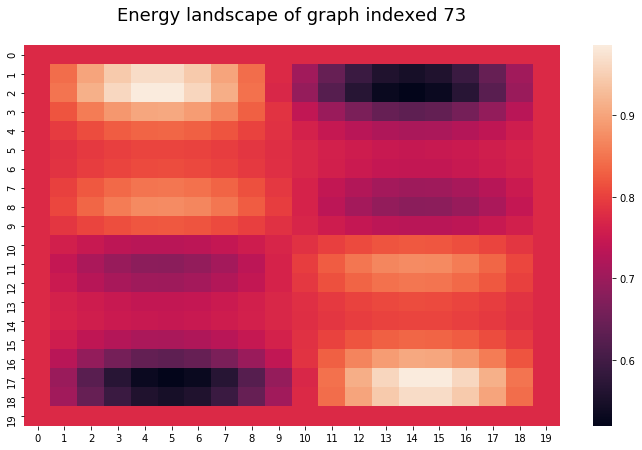

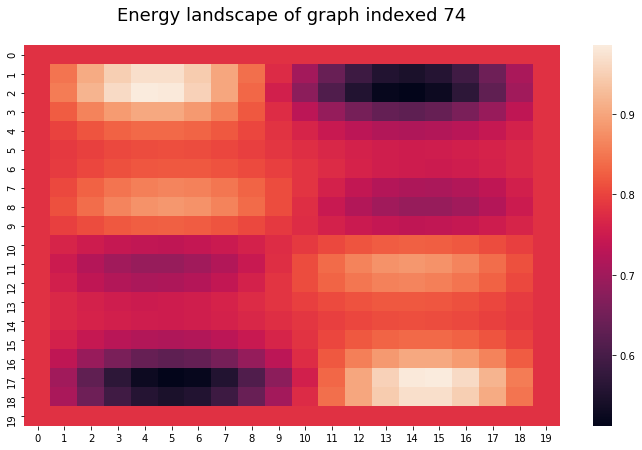

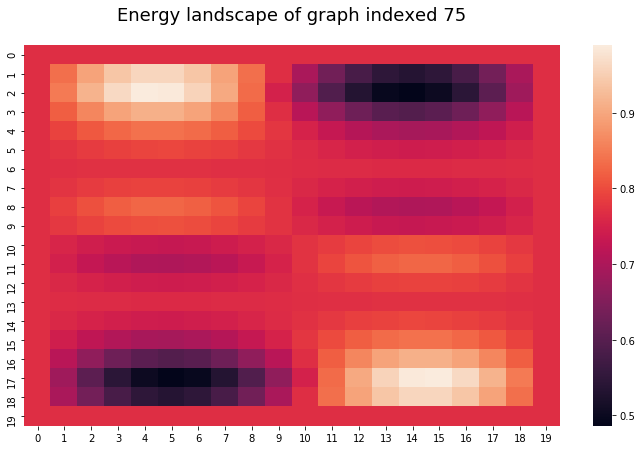

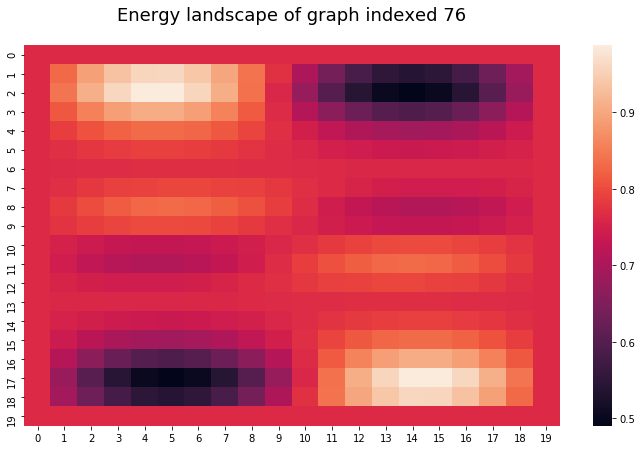

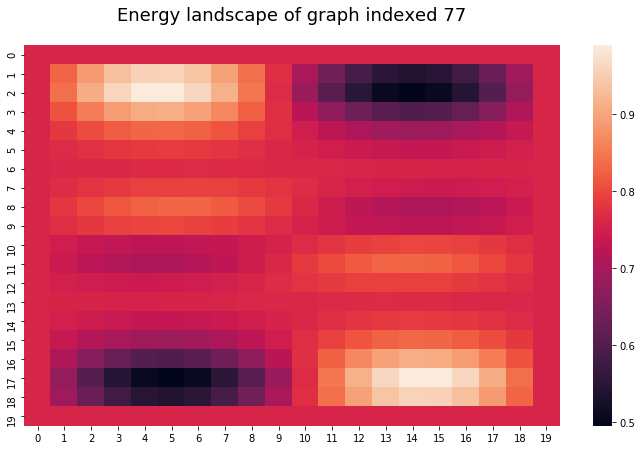

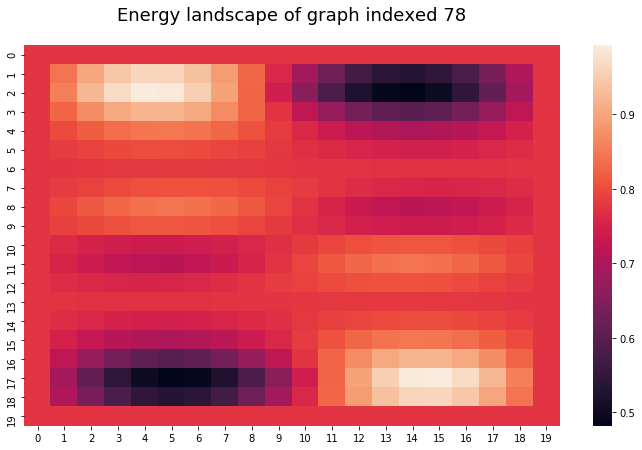

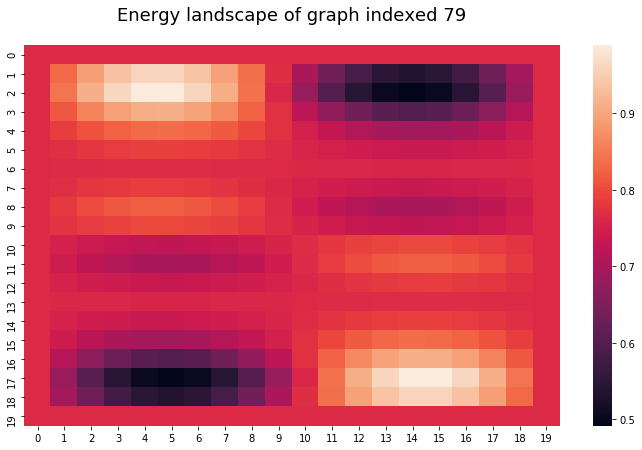

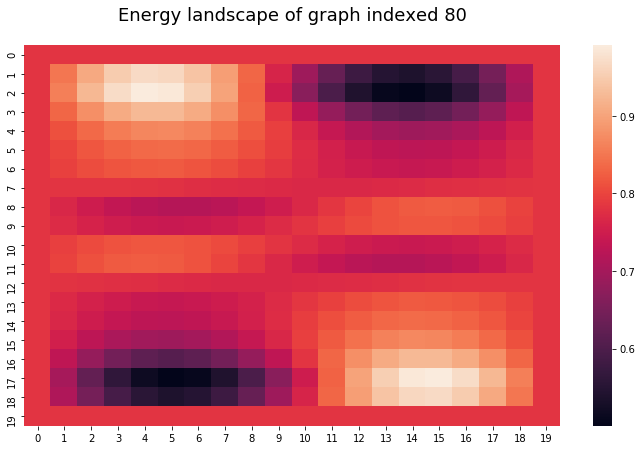

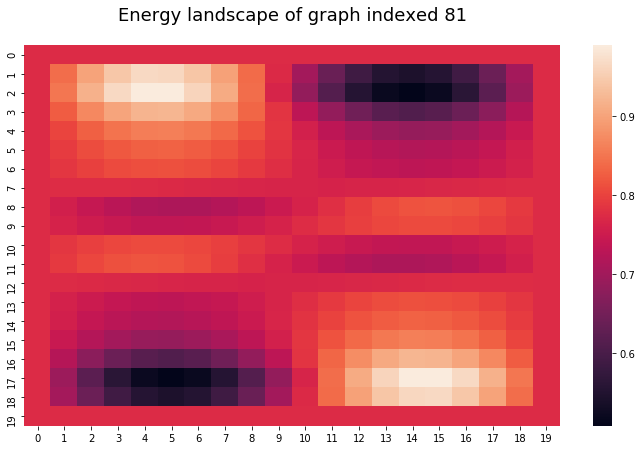

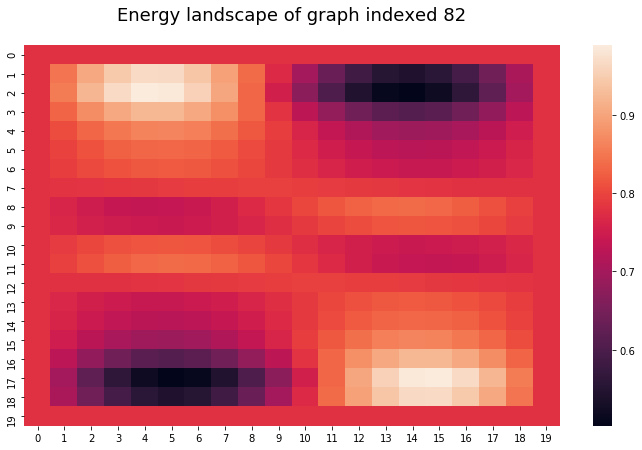

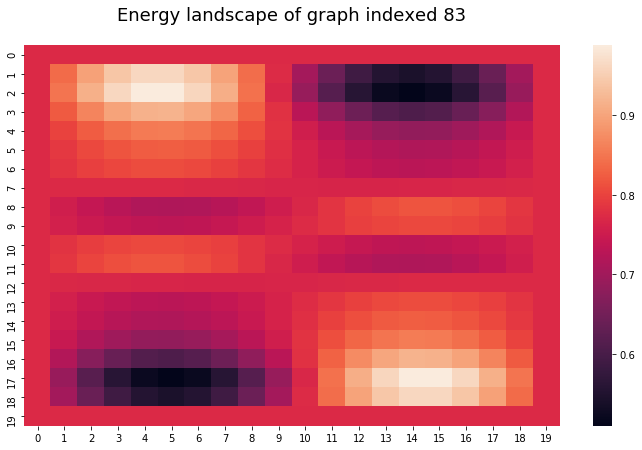

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



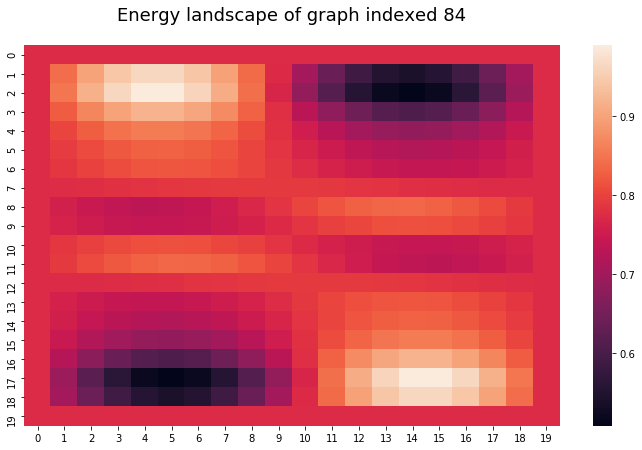

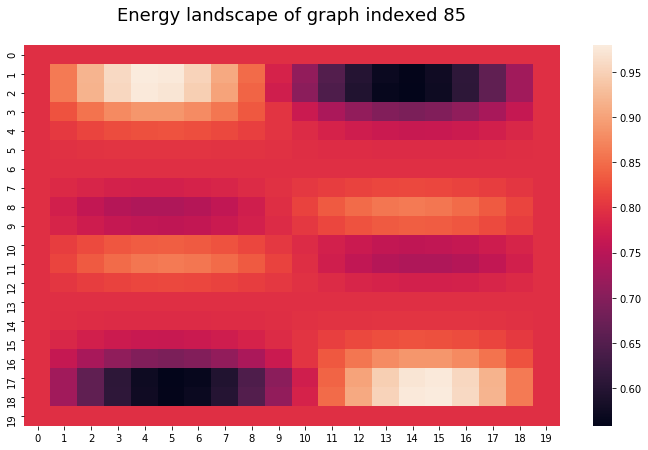

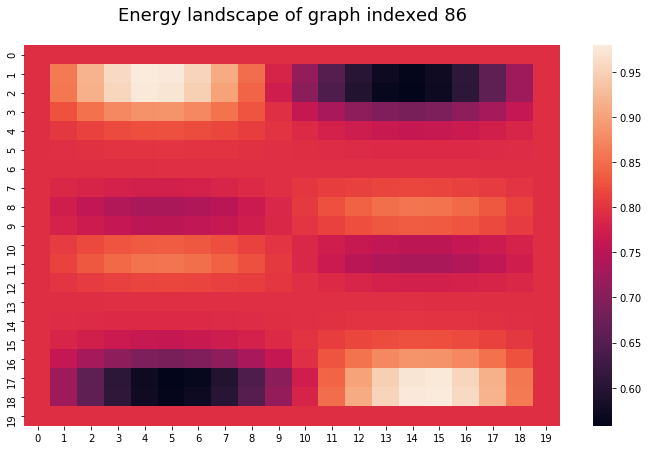

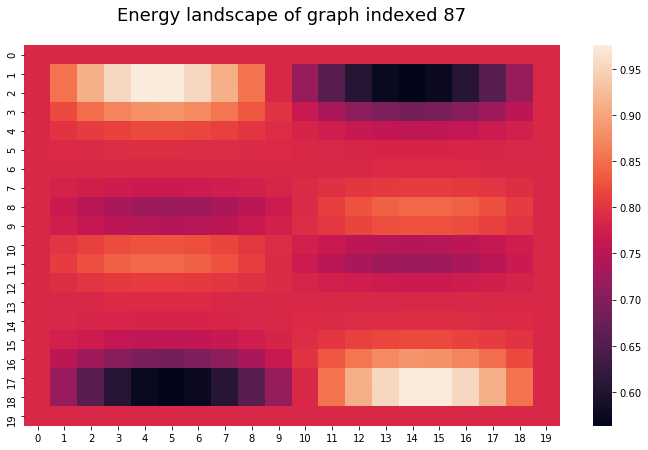

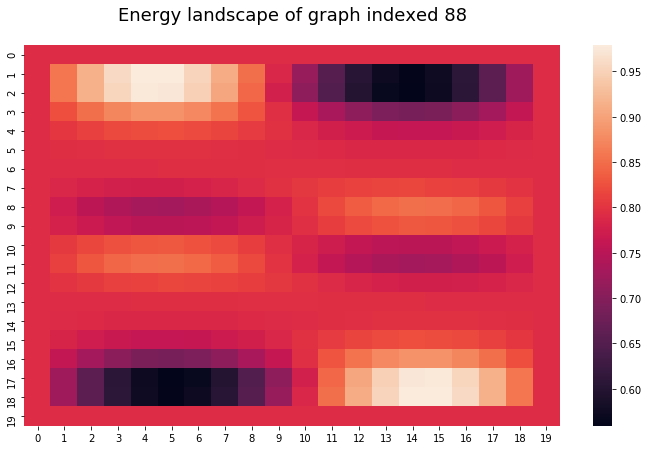

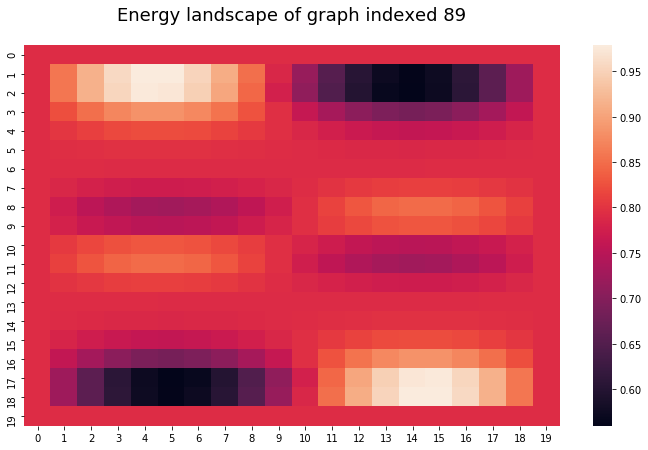

In [29]:
datas = []
for k in imp_graphs:
    step = 20
    gamma = np.linspace(0, 1, num = step)
    beta = np.linspace(0, 0.5, num = step)
    data = np.zeros((step, step))
    
    max_e = max_energies[k]

    for i in range(step):
      for j in range(step):
        
        data[step-i-1, j] = (QAOA_energy(g_list[k], gamma = [gamma[i]], beta = [beta[j]]))/max_e
    fig, ax = plt.subplots(figsize = (12, 7))
    title = "Energy landscape of graph indexed "+str(k)
    plt.title(title, fontsize = 18)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])
    sns.heatmap(data, ax = ax)
    plt.show()
    datas.append(data)

In [30]:
b_file = open("EnergyLandscapes30405060percent20nodeSep14.txt", "w")
for data_ in datas:
    for row in data_:
        np.savetxt(b_file, row)
b_file.close()